In [2]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

In [12]:
movimientos_wp="G:\Mi unidad\CARME\Trabajos\csv\deodorants_with_promo.csv"
df_wp = pd.read_csv(movimientos_wp, sep=",", skiprows=0)

In [3]:
movimientos_wop="G:\Mi unidad\CARME\Trabajos\csv\deodorants_without_promo.csv"
df_wop = pd.read_csv(movimientos_wop, sep=",", skiprows=0)

In [17]:
movimientos_wopp="G:\Mi unidad\CARME\Trabajos\csv\deodorants_without_promo_and_product_info.csv"
df_wopp = pd.read_csv(movimientos_wopp, sep=",", skiprows=0)

In [13]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136278 entries, 0 to 136277
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idb                     136278 non-null  int64  
 1   id_producto             136278 non-null  int64  
 2   fecha_trans             136278 non-null  object 
 3   fecha_desde             136278 non-null  object 
 4   fecha_hasta             136278 non-null  object 
 5   stock_unidades          136278 non-null  int64  
 6   venta_unidades          136278 non-null  int64  
 7   precio_unitario         136278 non-null  float64
 8   sigue_prod_en_rol       136278 non-null  int64  
 9   cd_abast                136278 non-null  int64  
 10  mov_month               136278 non-null  int64  
 11  mov_year                136278 non-null  int64  
 12  mov_weekday             136278 non-null  int64  
 13  ventas_estimadas_promo  136278 non-null  int64  
 14  nro_prom            

In [18]:
df_wp.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,ventas_estimadas_promo,nro_prom,duracion_promo,id_cadena,longitud,latitud,local,punto_dist,id_region
count,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.000000,136278.0,136278.0,129522.0
mean,7143.039126,386199.659622,19.362634,0.543015,47.134959,0.984664,4297.790289,6.216587,2017.388507,2.861298,23.915526,477085.219096,9.107919,4.473033,-58.651164,-34.980155,1.0,0.0,1.0
std,3189.393528,83475.499421,25.297721,1.134547,41.762189,0.122887,4598.030759,2.948122,1.148644,2.043863,31.778576,39563.177966,3.569107,2.540857,1.239358,1.884530,0.0,0.0,0.0
min,242.000000,164146.000000,-41.000000,-2.000000,15.060000,0.000000,0.000000,1.000000,2016.000000,0.000000,0.000000,425196.000000,3.000000,2.000000,-67.496036,-45.872649,1.0,0.0,1.0
25%,5207.000000,342682.000000,6.000000,0.000000,18.520000,1.000000,0.000000,4.000000,2016.000000,1.000000,4.000000,440560.000000,7.000000,2.000000,-58.696112,-34.989573,1.0,0.0,1.0
50%,9036.000000,427444.000000,12.000000,0.000000,40.140000,1.000000,0.000000,6.000000,2017.000000,3.000000,12.000000,473864.000000,7.000000,4.000000,-58.459282,-34.637957,1.0,0.0,1.0
75%,9161.000000,458393.000000,23.000000,1.000000,66.920000,1.000000,9217.000000,8.000000,2018.000000,5.000000,30.000000,518153.000000,9.000000,4.000000,-58.391991,-34.583457,1.0,0.0,1.0
max,9977.000000,507528.000000,679.000000,21.000000,416.520000,1.000000,9217.000000,12.000000,2019.000000,6.000000,300.000000,541066.000000,18.000000,9.000000,-56.722051,-29.141976,1.0,0.0,1.0


In [19]:
df_wp.nunique()

idb                       138
id_producto                76
fecha_trans               481
fecha_desde                75
fecha_hasta                69
stock_unidades            331
venta_unidades             24
precio_unitario            69
sigue_prod_en_rol           2
cd_abast                    2
mov_month                  12
mov_year                    4
mov_weekday                 7
ventas_estimadas_promo    152
nro_prom                  116
duracion_promo             13
id_cadena                   3
desc_cadena                 3
desc_region                 1
longitud                  123
latitud                   123
local                       1
punto_dist                  1
desc_producto              68
razon_social                3
id_region                   1
dtype: int64

In [20]:
df_wp.duplicated().sum()

0

In [21]:
df_wop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628466 entries, 0 to 7628465
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   row_id             int64  
 1   idb                int64  
 2   id_producto        int64  
 3   fecha_trans        object 
 4   stock_unidades     int64  
 5   venta_unidades     int64  
 6   precio_unitario    float64
 7   sigue_prod_en_rol  int64  
 8   cd_abast           int64  
 9   mov_month          int64  
 10  mov_year           int64  
 11  mov_weekday        int64  
 12  id_cadena          int64  
 13  desc_cadena        object 
 14  desc_region        object 
 15  longitud           float64
 16  latitud            float64
 17  local              int64  
 18  punto_dist         int64  
 19  desc_producto      object 
 20  razon_social       object 
 21  id_region          int64  
dtypes: float64(3), int64(14), object(5)
memory usage: 1.3+ GB


In [22]:
df_wop.describe()

,row_id,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,id_cadena,longitud,latitud,local,punto_dist,id_region
count,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7.628466e+06,7628466.0
mean,3.814234e+06,6.988987e+03,3.799335e+05,2.111803e+01,3.233868e-01,6.488032e+01,9.677600e-01,5.574024e+03,6.492431e+00,2.017676e+03,3.004350e+00,4.267013e+00,-5.872792e+01,-3.506435e+01,9.896953e-01,1.030469e-02,1.0
std,2.202149e+06,3.305814e+03,9.145256e+04,1.517671e+02,9.033925e-01,6.792035e+01,1.766370e-01,4.506222e+03,3.459326e+00,9.762576e-01,1.999314e+00,2.612152e+00,1.392877e+00,2.034668e+00,1.009877e-01,1.009877e-01,0.0
min,1.000000e+00,2.420000e+02,1.641490e+05,-5.420000e+02,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,1.0
25%,1.907117e+06,5.211000e+03,2.840120e+05,6.000000e+00,0.000000e+00,2.224000e+01,1.000000e+00,0.000000e+00,3.000000e+00,2.017000e+03,1.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.0
50%,3.814234e+06,9.026000e+03,4.218840e+05,1.000000e+01,0.000000e+00,3.760000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.0
75%,5.721350e+06,9.159000e+03,4.583940e+05,1.700000e+01,0.000000e+00,7.895000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.0
max,7.628466e+06,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.0


In [23]:
df_wop.nunique(axis=0)

row_id               7628466
idb                      142
id_producto               82
fecha_trans             1092
stock_unidades          3545
venta_unidades            68
precio_unitario          282
sigue_prod_en_rol          2
cd_abast                   2
mov_month                 12
mov_year                   4
mov_weekday                7
id_cadena                  3
desc_cadena                3
desc_region                1
longitud                 127
latitud                  127
local                      2
punto_dist                 2
desc_producto             81
razon_social               4
id_region                  1
dtype: int64

In [24]:
df_wop.duplicated().sum()

0

In [25]:
df_wop=df_wop.drop(['row_id'], axis=1)

In [141]:
df_wop=df_wop.sort_values(by=['idb','id_producto', 'fecha_trans'], ascending=True)
df_wop.head(100)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,id_cadena,desc_cadena,desc_region,longitud,latitud,local,punto_dist,desc_producto,razon_social,id_region
529961,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
5110359,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
1369586,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
2896543,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
5948668,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304838,242,228217,2016-10-13,15,0,16.16,1,0,10,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
2826277,242,228217,2016-10-13,15,0,16.16,1,0,10,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
5879236,242,228217,2016-10-13,15,0,16.16,1,0,10,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
715612,242,228217,2016-10-16,15,0,16.16,1,0,10,2016,...,4,vea,buenos aires,-60.95419,-34.58321,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1


In [26]:
df_wop.duplicated().sum()

2902249

In [27]:
df_wop.drop_duplicates()

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,id_cadena,desc_cadena,desc_region,longitud,latitud,local,punto_dist,desc_producto,razon_social,id_region
0,9023,507832,2019-03-29,0,0,34.70,1,9217,3,2019,...,2,disco,buenos aires,-58.410916,-34.587061,1,0,poett aerosol desodorante ambiental despertar ...,clorox argentina s.a.,1
1,9119,238237,2019-03-29,3,0,45.70,1,9217,3,2019,...,4,vea,buenos aires,-58.434477,-34.614950,1,0,poett poett lavanda full ab nuevo poett lavand...,clorox argentina s.a.,1
2,430,164149,2019-03-29,26,0,39.48,1,9217,3,2019,...,4,vea,buenos aires,-60.636206,-32.946868,1,0,glade toque rep lavanda 9gr/12 ar lavanda 9 grm,s. c. johnson y son de arg. s.a.,1
3,686,443521,2019-03-29,1,0,53.22,1,9217,3,2019,...,4,vea,buenos aires,-58.526405,-33.010391,1,0,poett poett natural blends floral 450 gr,clorox argentina s.a.,1
4,5626,342689,2019-03-29,5,0,38.23,1,9217,3,2019,...,9,jumbo,buenos aires,-58.630924,-34.453186,1,0,glade desodorante de ambientes baby crss nueva...,s. c. johnson y son de arg. s.a.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628461,5207,415268,2018-02-12,5,0,197.98,1,9217,2,2018,...,9,jumbo,buenos aires,-58.278783,-34.759719,1,0,freshmatic bosque magico aparato air wick lush...,reckitt benckiser argentina s.a.,1
7628462,266,467698,2018-02-12,13,0,207.08,1,9217,2,2018,...,4,vea,buenos aires,-58.729802,-38.561925,1,0,glade automatico desodorante de ambientes manz...,s. c. johnson y son de arg. s.a.,1
7628463,9042,342745,2018-02-12,18,0,22.51,1,9217,2,2018,...,2,disco,buenos aires,-57.975326,-34.934655,1,0,glade desodorante de ambientes jazmin nueva fo...,s. c. johnson y son de arg. s.a.,1
7628464,9025,427444,2018-02-12,6,0,76.73,1,9217,2,2018,...,2,disco,buenos aires,-58.391347,-34.593032,1,0,glade aerosol gld automatico rep manzana y can...,s. c. johnson y son de arg. s.a.,1


In [28]:
df_wop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628466 entries, 0 to 7628465
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   idb                int64  
 1   id_producto        int64  
 2   fecha_trans        object 
 3   stock_unidades     int64  
 4   venta_unidades     int64  
 5   precio_unitario    float64
 6   sigue_prod_en_rol  int64  
 7   cd_abast           int64  
 8   mov_month          int64  
 9   mov_year           int64  
 10  mov_weekday        int64  
 11  id_cadena          int64  
 12  desc_cadena        object 
 13  desc_region        object 
 14  longitud           float64
 15  latitud            float64
 16  local              int64  
 17  punto_dist         int64  
 18  desc_producto      object 
 19  razon_social       object 
 20  id_region          int64  
dtypes: float64(3), int64(13), object(5)
memory usage: 1.2+ GB


In [29]:
df_wopp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591692 entries, 0 to 591691
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idb                     591692 non-null  int64  
 1   id_producto             591692 non-null  int64  
 2   fecha_trans             591692 non-null  object 
 3   fecha_desde             0 non-null       float64
 4   fecha_hasta             0 non-null       float64
 5   stock_unidades          591692 non-null  int64  
 6   venta_unidades          591692 non-null  int64  
 7   precio_unitario         591692 non-null  float64
 8   sigue_prod_en_rol       591692 non-null  int64  
 9   cd_abast                591692 non-null  int64  
 10  mov_month               591692 non-null  int64  
 11  mov_year                591692 non-null  int64  
 12  mov_weekday             591692 non-null  int64  
 13  ventas_estimadas_promo  0 non-null       float64
 14  nro_prom            

In [30]:
df_wopp.duplicated().sum()

0

In [52]:
df=pd.concat([df_wop, df_wp, df_wopp],keys=["with promo", "without promo", "without product info"], names="type", sort=False, ignore_index=True)

In [53]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,id_cadena,longitud,latitud,local,punto_dist,id_region,ventas_estimadas_promo,nro_prom,duracion_promo
count,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,8.356436e+06,7757988.0,136278.000000,136278.000000,136278.000000
mean,6.989843e+03,3.786228e+05,2.049318e+01,3.136131e-01,6.428687e+01,9.610044e-01,5.434157e+03,6.487117e+00,2.017666e+03,3.001924e+00,4.277516e+00,-5.872825e+01,-3.506379e+01,9.897814e-01,1.021859e-02,1.0,23.915526,477085.219096,9.107919
std,3.299995e+03,9.155368e+04,1.453685e+02,8.866158e-01,6.586838e+01,1.935844e-01,4.533935e+03,3.452958e+00,9.812633e-01,2.000141e+00,2.618616e+00,1.394622e+00,2.035644e+00,1.005692e-01,1.005692e-01,0.0,31.778576,39563.177966,3.569107
min,2.420000e+02,1.641460e+05,-5.420000e+02,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,1.0,0.000000,425196.000000,3.000000
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,1.000000e+00,0.000000e+00,4.000000e+00,2.017000e+03,1.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.0,4.000000,440560.000000,7.000000
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.0,12.000000,473864.000000,7.000000
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.0,30.000000,518153.000000,9.000000
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.0,300.000000,541066.000000,18.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356436 entries, 0 to 8356435
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   idb                     int64  
 1   id_producto             int64  
 2   fecha_trans             object 
 3   stock_unidades          int64  
 4   venta_unidades          int64  
 5   precio_unitario         float64
 6   sigue_prod_en_rol       int64  
 7   cd_abast                int64  
 8   mov_month               int64  
 9   mov_year                int64  
 10  mov_weekday             int64  
 11  id_cadena               int64  
 12  desc_cadena             object 
 13  desc_region             object 
 14  longitud                float64
 15  latitud                 float64
 16  local                   int64  
 17  punto_dist              int64  
 18  desc_producto           object 
 19  razon_social            object 
 20  id_region               float64
 21  fecha_desde             object 

In [55]:
df.duplicated().sum()

2902249

In [95]:
df_cleaned=df.drop_duplicates()

In [57]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454187 entries, 0 to 8356435
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   idb                     int64  
 1   id_producto             int64  
 2   fecha_trans             object 
 3   stock_unidades          int64  
 4   venta_unidades          int64  
 5   precio_unitario         float64
 6   sigue_prod_en_rol       int64  
 7   cd_abast                int64  
 8   mov_month               int64  
 9   mov_year                int64  
 10  mov_weekday             int64  
 11  id_cadena               int64  
 12  desc_cadena             object 
 13  desc_region             object 
 14  longitud                float64
 15  latitud                 float64
 16  local                   int64  
 17  punto_dist              int64  
 18  desc_producto           object 
 19  razon_social            object 
 20  id_region               float64
 21  fecha_desde             object 

In [45]:
df_cleaned.nro_prom.unique()

array([    nan, 538897., 541066., 540948., 537641., 540438., 537880.,
       537640., 537526., 534329., 528346., 533035., 531117., 530475.,
       527744., 523202., 523199., 528354., 528297., 526642., 518153.,
       521675., 508392., 517111., 517727., 516706., 514859., 502704.,
       502706., 509499., 508138., 502702., 502700., 506453., 506458.,
       505308., 503379., 501260., 497898., 494122., 493122., 495391.,
       491206., 493272., 491204., 491205., 492977., 490361., 490360.,
       488290., 484090., 484088., 484062., 480036., 480040., 480039.,
       482626., 482703., 479935., 476757., 476707., 473865., 473868.,
       473864., 470166., 469699., 459100., 459098., 463518., 463031.,
       459096., 462509., 459088., 459441., 459444., 459445., 456807.,
       456804., 457107., 453690., 453692., 449953., 452913., 452976.,
       450777., 450801., 446144., 446146., 446149., 444289., 440560.,
       440561., 443296., 440565., 440666., 436828., 436833., 436830.,
       439935., 4370

In [58]:
df_cleaned=df.fillna(0)

In [59]:
df_cleaned.nro_prom.unique()

array([    nan, 538897., 541066., 540948., 537641., 540438., 537880.,
       537640., 537526., 534329., 528346., 533035., 531117., 530475.,
       527744., 523202., 523199., 528354., 528297., 526642., 518153.,
       521675., 508392., 517111., 517727., 516706., 514859., 502704.,
       502706., 509499., 508138., 502702., 502700., 506453., 506458.,
       505308., 503379., 501260., 497898., 494122., 493122., 495391.,
       491206., 493272., 491204., 491205., 492977., 490361., 490360.,
       488290., 484090., 484088., 484062., 480036., 480040., 480039.,
       482626., 482703., 479935., 476757., 476707., 473865., 473868.,
       473864., 470166., 469699., 459100., 459098., 463518., 463031.,
       459096., 462509., 459088., 459441., 459444., 459445., 456807.,
       456804., 457107., 453690., 453692., 449953., 452913., 452976.,
       450777., 450801., 446144., 446146., 446149., 444289., 440560.,
       440561., 443296., 440565., 440666., 436828., 436833., 436830.,
       439935., 4370

In [96]:
df_cleaned=df_cleaned.sort_values(by=['idb','id_producto', 'fecha_trans'], ascending=True)
#df_pproducto=df3.groupby(['idb', id_producto],as_index=False )

In [97]:
df_cleaned.head(1000)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,fecha_desde,fecha_hasta,ventas_estimadas_promo,nro_prom,duracion_promo
529961,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
1369586,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
2133603,242,228217,2016-07-17,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
529630,242,228217,2016-07-21,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
2285438,242,228217,2016-07-22,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587331,242,238239,2017-04-25,12,0,16.77,1,0,4,2017,...,1,0,poett poett lavanda refill ab nuevo poett lava...,clorox argentina s.a.,1.0,NaN,NaN,NaN,NaN,NaN
6882858,242,238239,2017-04-27,12,0,16.77,1,0,4,2017,...,1,0,poett poett lavanda refill ab nuevo poett lava...,clorox argentina s.a.,1.0,NaN,NaN,NaN,NaN,NaN
2614115,242,238239,2017-04-28,12,0,16.77,1,0,4,2017,...,1,0,poett poett lavanda refill ab nuevo poett lava...,clorox argentina s.a.,1.0,NaN,NaN,NaN,NaN,NaN
701310,242,238239,2017-04-29,12,0,16.77,1,0,4,2017,...,1,0,poett poett lavanda refill ab nuevo poett lava...,clorox argentina s.a.,1.0,NaN,NaN,NaN,NaN,NaN


Cual es el producto que tiene mayor rotacion por local, por ano, por mes.
La rotacion de un producto se calcula por Rotación = Ventas del periodo (precio de coste) / Stock medio del periodo
Que es lo mismo que Ventas del periodo/(Ud stock al inicio - Ud stok al final del periodo)

In [113]:
df_tasa=df.groupby(['idb','id_producto','mov_year'], as_index=False)['venta_unidades'].sum()

In [114]:
df_tasa

,idb,id_producto,mov_year,venta_unidades
0,242,228217,2016,22
1,242,228217,2017,14
2,242,228217,2018,38
3,242,228217,2019,40
4,242,228683,2018,8
...,...,...,...,...
35251,9977,511324,2019,22
35252,9977,511325,2018,10
35253,9977,511325,2019,22
35254,9977,511326,2018,0


In [115]:
df_stock_medio=df.groupby(['idb','id_producto','mov_year'], as_index=False)['stock_unidades'].mean()

In [116]:
df_stock_medio

,idb,id_producto,mov_year,stock_unidades
0,242,228217,2016,21.122905
1,242,228217,2017,12.413265
2,242,228217,2018,7.878676
3,242,228217,2019,15.824742
4,242,228683,2018,14.262238
...,...,...,...,...
35251,9977,511324,2019,4.888268
35252,9977,511325,2018,4.200000
35253,9977,511325,2019,4.025907
35254,9977,511326,2018,3.965517


In [129]:
df_tasa_2['media_stock']=df_stock_medio['stock_unidades']
df_tasa_2['RI']=df_tasa['venta_unidades']/df_stock_medio['stock_unidades']
df_tasa_2=df_tasa_2.drop(['stock_unidades'], axis=1)

In [130]:
df_tasa_2

,id_producto,idb,mov_year,venta_unidades,media_stock,RI
0,228217,242,2016,22.0,21.122905,1.041523
1,228217,242,2017,14.0,12.413265,1.127826
2,228217,242,2018,38.0,7.878676,4.823145
3,228217,242,2019,40.0,15.824742,2.527687
4,228683,242,2018,8.0,14.262238,0.560922
...,...,...,...,...,...,...
35251,511324,9977,2019,NaN,4.888268,4.500571
35252,511325,9977,2018,NaN,4.200000,2.380952
35253,511325,9977,2019,NaN,4.025907,5.464607
35254,511326,9977,2018,NaN,3.965517,0.000000


In [139]:
df_tasa_2.groupby(['id_producto','mov_year']).[RI].nlargest()

SyntaxError: invalid syntax (2431421448.py, line 1)

In [136]:
#df_tasa_2.plot(x='id_producto', y= 'RI', kind="bar",figsize=(20,2))
sns.catplot(x="id_producto", y="RI", data=df_tasa_2, kind= "bar" ,height=20, aspect=2,row='mov_year')
plt.title("RI by product & idb")
plt.xlabel("product")
plt.xticks(rotation=90)
plt.ylabel('RI')
plt.show()

NameError: name 'h' is not defined

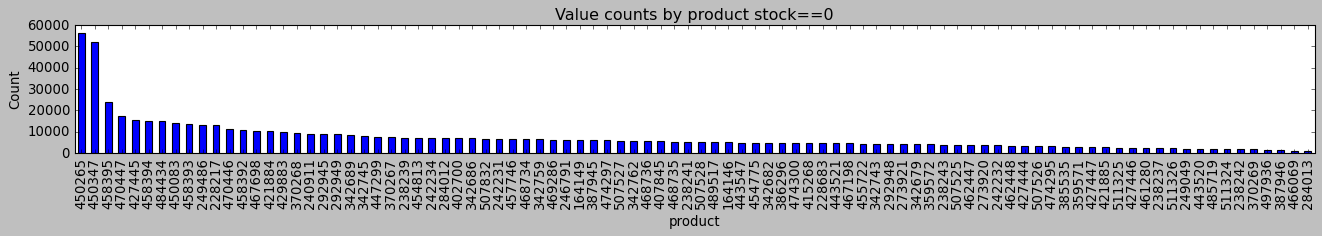

In [69]:
df_stock0.id_producto.value_counts().plot(kind="bar",figsize=(20,2))
plt.title("Value counts by product stock==0")
plt.xlabel("product")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [76]:
df_1=df_0.id_producto.value_counts().nlargest(5)
df

In [75]:
df_1.nlargest(5)

450265    56078
450347    52183
458395    23937
470447    17248
427445    15506
Name: id_producto, dtype: int64

In [108]:
df4.duplicated().sum()

0

In [109]:
df4=df4.drop(['row_id'], axis=1)

In [111]:
df4.head(1000)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,fecha_desde,fecha_hasta,ventas_estimadas_promo,nro_prom,duracion_promo
529961,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
5110359,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
1369586,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
2896543,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
5948668,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543950,247,228217,2016-12-20,0,0,17.53,1,0,12,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
3938536,247,228217,2016-12-22,0,0,17.53,1,0,12,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
4696979,247,228217,2016-12-22,0,0,17.53,1,0,12,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN
4007916,247,228217,2016-12-24,0,0,17.53,1,0,12,2016,...,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1.0,NaN,NaN,NaN,NaN,NaN


In [112]:
df4.duplicated().sum()

48621

In [ ]:
df4=df4.drop(df4[df4['venta_unidades']==0], axis=1)

In [105]:
df4.head(1000)

""
529961
5110359
1369586
2896543
5948668
...
4543950
3938536
4696979
4007916
